# Introduction to Linear Regression


## Agenda

- Use the **pandas library** to read data into Python
- Use the **seaborn library** to visualize data
- **train and interpret** a linear regression model in scikit-learn
- Basic **evaluation metrics** for regression problems
- Choice on **which features to include** in my model

## Motivation

- widely used
- runs fast
- easy to use
- basis for many other methods

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

In [19]:
# import pandas
import pandas as pd

## Understanding the data

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

#### What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [2]:
# read CSV file into the Pandas DataFrame
data = pd.read_csv('../datasets/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
type(data)

pandas.core.frame.DataFrame

Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [6]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

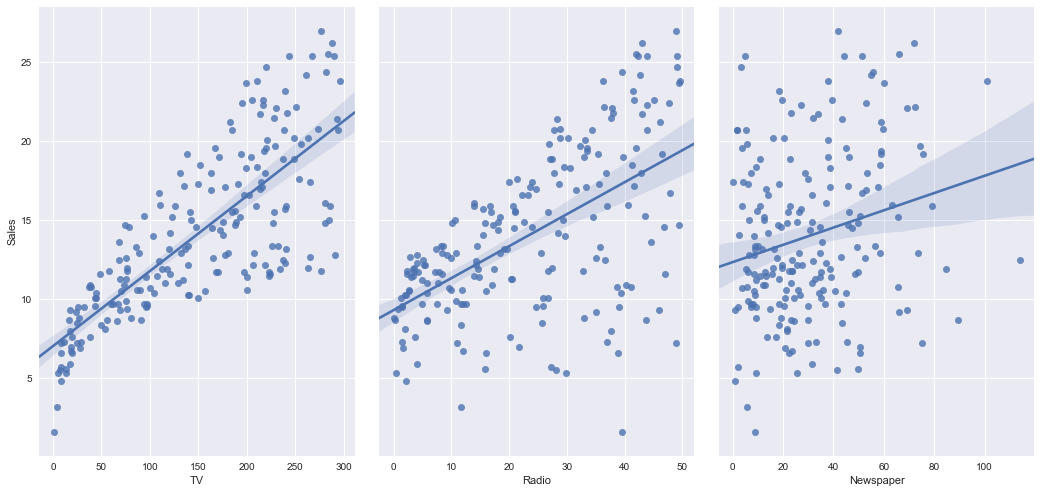

In [21]:
# visualize the relationship between the features and the response using scatterplots, with the least squares line
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $\beta_0$ is the intercept or bias
- $\beta_1$ is the coefficient for $x_1$ (the first feature)

### Preparing X and y using pandas

- scikit-learn expects X (input/feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [9]:
# create a Python list of feature names
feature_cols = ['TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8


In [10]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [11]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

7.03259354913
[ 0.04753664]


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [13]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [14]:
# you have to create a DataFrame
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
linreg.predict(X_new)

array([ 9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

In [15]:
# print the R-squared value for the model
linreg.score(X, y)

0.61187505085007099

## Multiple Linear Regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept or bias
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [16]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]


# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [17]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [18]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [19]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [20]:
# split X and y into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# default split is 75% for training and 25% for testing
print(X_train.shape,type(X_train) )
print(y_train.shape, type(y_train))
print(X_test.shape, type(X_test))
print(y_test.shape, type(y_test))

((150, 3), <class 'pandas.core.frame.DataFrame'>)
((150,), <class 'pandas.core.series.Series'>)
((50, 3), <class 'pandas.core.frame.DataFrame'>)
((50,), <class 'pandas.core.series.Series'>)


In [22]:
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [24]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150267),
 ('Radio', 0.17915812245088833),
 ('Newspaper', 0.0034504647111804365)]

In [25]:
# print the R-squared value for the model
linreg.score(X_train, y_train)

0.89030755775566495

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.


### Making predictions

In [28]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

print(y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


## Model Evaluation metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared**  - a statistical measure of how close the data are to the fitted regression line

$$1-\frac {n.MSE} {\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Computing the RMSE for our Sales predictions

In [29]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the R-Squared and RMSE

In [30]:
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the R-squared value for the model
print(linreg.score(X_train, y_train))

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.890149809812
1.38790346994


### Feature Conclusion

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## What Didn't We Cover?

- Detecting collinearity
- Transforming features to fit non-linear relationships
- Assumptions of linear regression
- And some  more!